## RNA secondary structure

As we will discuss in the lecture, the 3D structure of biopolymers, whether proteins or RNAs, is crucial for their functions. For instance, tRNAs fold into characteristic clover leaf structures, while miRNAs - which are small RNAs (~22 nucleotides in their final functional form) - are generated from precursors that fold into hairpins. These structures are maintained though evolution, despite changes in the sequence. Consequently, one approach to finding regions in the genome that encode particular types of RNAs is to look for regions that fold into the structure characteristic for the RNA of interest.

The hairpin structure of miRNA precursors can be found quite frequently in genomes, so on its own, is not sufficient for a reliable prediction of miRNA-encoding genes. However, one study (https://academic.oup.com/bioinformatics/article/20/17/2911/186725) went a step further in evaluating the significance of hairpin-forming sequences. Specifically, the authors reasoned that miRNA sequences have undergone evolutionary optimization to form the hairpins that they form, while other sequences with the same nucleotide composition would not. They went to show this via randomization, which you can try to replicate.

Specifically,
1. you can download miRNA precursor sequences from the standard repository of the field, miRBase, https://www.mirbase.org/download/.
There are sequences from many organisms, you can recognize the human sequences by the prefix of their name - hsa.
2. using either the webserver or the distributable version of RNAfold (http://rna.tbi.univie.ac.at/cgi-bin/RNAWebSuite/RNAfold.cgi), predict the secondary structure of human miRNA precursors and record their minimum free energy of folding.
3. for each human miRNA precursor generate 1000 shuffled variant sequences, with the same nucleotide composition.
4. predict the MFE for all of the shuffled variants and calculate the z-score of the original sequence with respect to its shuffled variants.

You could try the same procedure for tRNAs (from https://gtrnadb.ucsc.edu/genomes/eukaryota/Hsapi38/hg38-mature-tRNAs.fa).

What do you conclude?

**Note**: if you cannot install the standalone version of RNAfold, limit the number of miRNAs/tRNAs that you submit to the server.

In [37]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time

from Bio import SeqIO
from RNA import RNA
from multiprocessing import Pool, cpu_count

In [38]:
sequences = []
fasta_sequences = SeqIO.parse(open('hairpin.fa'),'fasta')
for fasta in fasta_sequences:
    name, sequence = fasta.id, str(fasta.seq)
    sequences.append(sequence)

sequences = sequences[:100]

In [39]:
def fold_sequence(sequence: str) -> float:
    fold, fold_mfe = RNA.fold(sequence)
    return fold_mfe

In [40]:
def z_score(true_mfe: float, shuffle_mfe: list[float]) -> float:
    z = (true_mfe - np.mean(shuffle_mfe)) / np.var(shuffle_mfe)
    return z

In [41]:
def shuffle(sequence: str, amount: int = 100) -> list[str]:
    shuffle_sequences = []
    for i in range(amount):
        l = list(sequence)
        random.shuffle(l)
        shuffle_sequences.append(''.join(l))

    return shuffle_sequences

In [42]:
def shuffle_score(sequence: str) -> float:
    shuffle_sequences = shuffle(sequence)
    true_mfe = fold_sequence(sequence)
    shuffle_mfe = []
    for seq in shuffle_sequences:
        shuffle_mfe.append(fold_sequence(seq))
    z = z_score(true_mfe, shuffle_mfe)
    return z

100


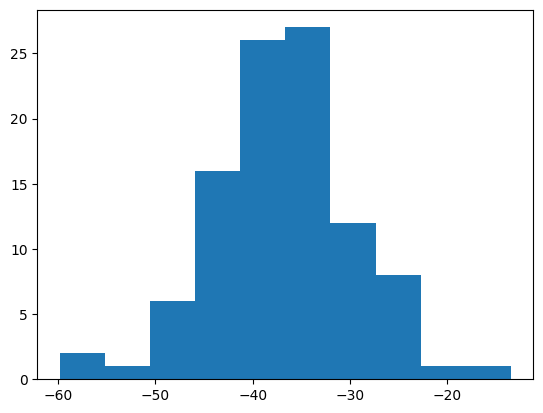

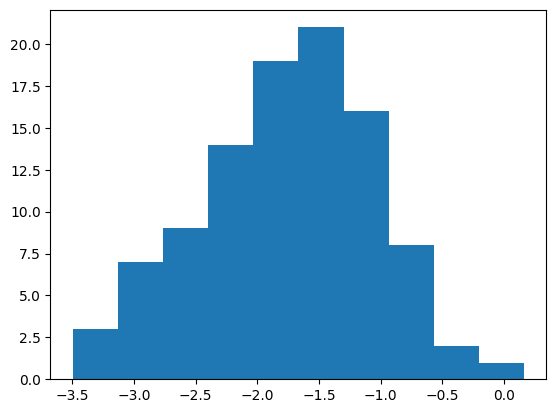

In [43]:
mfes = []
with Pool(cpu_count()) as pool:
    mfes = pool.map(fold_sequence, sequences)
print(len(mfes))

plt.hist(mfes)
plt.show()

with Pool(cpu_count()) as pool:
    z = pool.map(shuffle_score, sequences)

plt.hist(z)
plt.show()